In [1]:
from numpy import sin, cos, zeros, linspace
from pylab import imshow, plot, colorbar
from math import pi, sqrt

print('Librerias')

Librerias


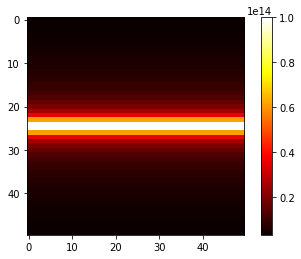

In [2]:
def fx(rqx1): # Función para el campo electrico en X
  return rqx1**-2

def fy(rqx2, rqy): # Función para el campo electrico en Y
  return rqy*((rqx2**2 + rqy**2)**-(3/2))

n = 50
a = -5
b = 5
h = (b-a)/n

denlin = 100 #Densidad de carga lineal
eo = 8.8541878176e-12 #Permitividad electrica en el vacio
cns = denlin/(4*pi*eo) #Valor constante fuera de la integral

E = zeros([n, n], float)
rx = linspace(-5, 5, n) #Coordenadas X de cada pixel
ry = linspace(-5, 5, n) #Coordenadas Y de cada pixel

for y in range(n):
  for x in range(n):
    i = rx[x]
    j = ry[y]

    Ex = fx(a)+fx(b) # Campo electrico en X para los extremos
    Ey = fy(a,j)+fy(b,j) # Campo electrico en Y para los extremos

    for k in range(1, n ,2): #Datos del campo electrico en X a lo largo de esta
      Ex+=(4*fx((a+k*h)-i))
      Ey+=(4*fy(a+(k*h), j))

    for l in range(2, n, 2): #Datos del campo electrico en Y a lo largo de esta
      Ex+=(2*fx((a+k*h)-i))
      Ey+=(2*fy(a+(k*h), j))

    Ex = Ex*(h/3)
    Ex = Ey*(h/3)

    E[y,x] = cns*sqrt(Ex**2 + Ey**2) #Calculo del campo electrico en cada pixel

imshow(E, cmap="hot", vmax=1e14)
colorbar()